# Data Analysis för framtids sägrar!

In [28]:
import pickle
import pandas as pd
import seaborn as sns

## get data from pickle

In [328]:
# check out available files
%ls data

results_2022_M_1001_2000.pickle  results_2022_M_2001_4000.pickle
results_2022_M_1_100.pickle      results_2022_M_4001_5000.pickle
results_2022_M_1_1000.pickle     results_2022_M_5001_6000.pickle
results_2022_M_1_2.pickle        results_2022_M_6001_7000.pickle
results_2022_M_1_4.pickle        results_2022_M_7001_8000.pickle


In [424]:
def get_and_concat_dfs(file_list):
    df = pd.DataFrame()
    for file in file_list:
        with open(f'data/{file}', 'rb') as f:
            df_tmp = pickle.load(f)
    
            # convert to datetime
            df_tmp['Time'] = pd.to_datetime(df_tmp['Time'])
            df = pd.concat([df,df_tmp], axis=0)
            df.reset_index(drop=True, inplace=True)

            # for easier sorting: string to int
            df['StartGroup_int'] = df['StartGroup'].str.extract('(\d+)', expand=False).astype(int)

    return(df)

# GET DATA
df = get_and_concat_dfs(['results_2022_M_1_1000.pickle',
                         'results_2022_M_1001_2000.pickle',
                         'results_2022_M_2001_4000.pickle',
                         'results_2022_M_4001_5000.pickle',
                         'results_2022_M_5001_6000.pickle',
                         'results_2022_M_6001_7000.pickle',
                         'results_2022_M_7001_8000.pickle',
                         'results_2022_M_8001_9000.pickle',
                         'results_2022_M_9001_10000.pickle'])
df.shape

(9993, 11)

In [180]:
df.columns

Index(['Bib', 'Group', 'Name', 'Nation', 'Sex', 'Place', 'StartGroup', 'Time',
       'Place_cat', 'Year'],
      dtype='object')

In [186]:
df

,Bib,Group,Name,Nation,Sex,Place,StartGroup,Time,Place_cat,Year
0,M15,H21,"Nygaard, Andreas",NOR,M,1,VL0,2022-03-12 03:32:18,1,2022
1,M4,H21,"Persson, Emil",SWE,M,2,VL0,2022-03-12 03:32:19,2,2022
2,M49,H21,"Jutterström, Axel",SWE,M,3,VL0,2022-03-12 03:32:20,3,2022
3,M29,H21,"Stadaas, Kasper",NOR,M,4,VL0,2022-03-12 03:32:21,4,2022
4,M32,H21,"Thele, Joar Andreas",NOR,M,5,VL0,2022-03-12 03:32:21,5,2022
...,...,...,...,...,...,...,...,...,...,...
1995,6169,H55,"Kožnar, Aleš",CZE,M,2086,VL6,2022-03-12 05:35:33,1996,2022
1996,3775,H40,"Andersson, Andreas",SWE,M,2087,VL3,2022-03-12 05:35:33,1997,2022
1997,4286,H55,"Koch, Daniel",SWE,M,2088,VL4,2022-03-12 05:35:34,1998,2022
1998,2047,H45,"Börjefors, Anders",SWE,M,2089,VL2,2022-03-12 05:35:36,1999,2022


# Number of finishers per startblock
* (not sure how many started though)

In [236]:
df['StartGroup'].unique()

array(['VL0', 'VL1', 'VL2', 'VL3', 'VL4', 'VL6', 'VL5', 'VL10', 'VL7',
       'VL8'], dtype=object)

Text(0.5, 1.0, 'count at finish per Startgroup')

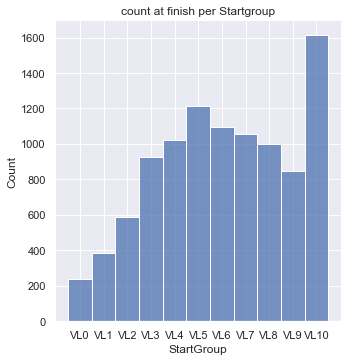

In [425]:
sns.set_style('darkgrid')
sns.displot(df.sort_values(by='StartGroup_int')['StartGroup'])
plt.title('count at finish per Startgroup')

In [426]:
df_startblocks = df.groupby(by=['StartGroup']).count()
df_startblocks['percentage'] = df_startblocks['Bib']/df_startblocks['Bib'].sum()
print('percentage of racers from Startgroups in first 1000 ')
df_startblocks['percentage']

percentage of racers from Startgroups in first 1000 


StartGroup
VL0     0.023817
VL1     0.038627
VL10    0.161513
VL2     0.058741
VL3     0.092765
VL4     0.102472
VL5     0.121685
VL6     0.109877
VL7     0.105774
VL8     0.099870
VL9     0.084859
Name: percentage, dtype: float64

# Participating Nations
* Total number
* in startblocks (barplots 100%)
* at finish (1000 racers bins, barplots 100%)
* CDF per nation (stacked) over Startgroups and 1000er bins

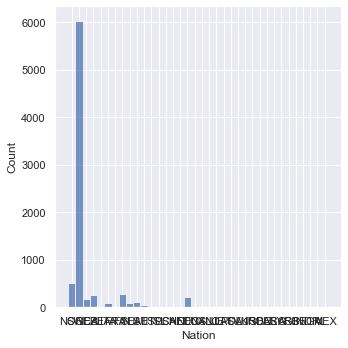

In [332]:
sns.set_style('darkgrid')
sns.displot(df['Nation'])

In [428]:
df_nation = df.groupby(by=['Nation']).count()[['Bib']]
df_nation = df_nation.rename(columns={'Bib':'count'})
df_nation['percentage'] = df_nation['count']/df_nation['count'].sum()
df_nation = df_nation.sort_values(by='percentage', ascending=False)
df_nation

,count,percentage
Nation,,
SWE,7632,0.763735
NOR,553,0.055339
DEN,318,0.031822
FIN,300,0.030021
CZE,296,0.029621
GER,199,0.019914
SUI,117,0.011708
EST,116,0.011608
ITA,101,0.010107


<AxesSubplot:title={'center':'participants per nation [%]'}, xlabel='Nation'>

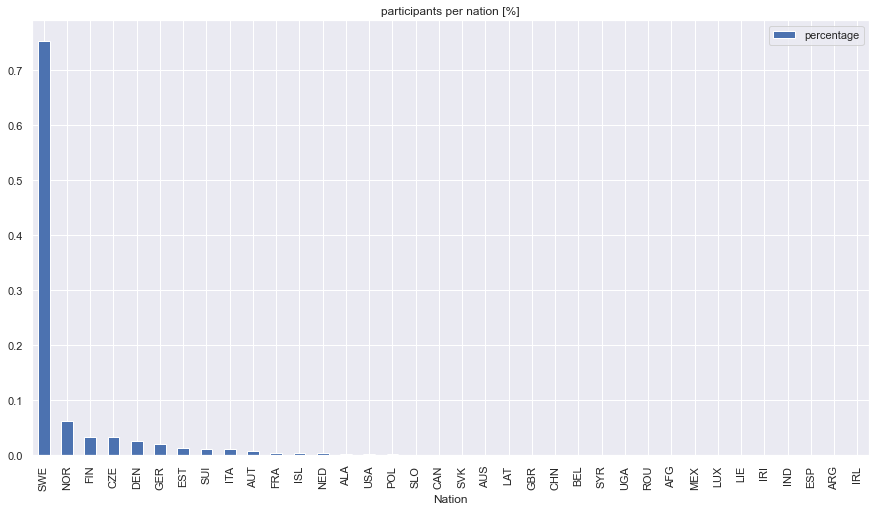

In [427]:
df_nation[['percentage']].plot.bar(title='participants per nation [%]')

### per Startgroup

In [262]:
# massage data into right format
df_stgroup_nation = df.groupby(by=['StartGroup','Nation'], as_index=False).count()[['StartGroup','Nation','Bib']]
df_stgroup_nation = df_stgroup_nation.pivot(index='StartGroup',columns='Nation',values='Bib').fillna(0)
df_stgroup_nation = df_stgroup_nation.sort_values(by='VL1',axis=1,ascending=False)
df_stgroup_nation

Nation,SWE,NOR,FIN,CZE,ITA,SUI,GER,DEN,EST,ALA,...,LIE,LUX,IRI,ESP,POL,ROU,SLO,CHN,SVK,AUT
StartGroup,,,,,,,,,,,,,,,,,,,,,
VL0,107.0,68.0,16.0,9.0,12.0,4.0,9.0,0.0,2.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0
VL1,265.0,50.0,22.0,14.0,8.0,6.0,6.0,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VL10,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
VL2,394.0,71.0,29.0,19.0,11.0,8.0,15.0,4.0,6.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,7.0
VL3,641.0,68.0,35.0,43.0,10.0,21.0,22.0,8.0,21.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,13.0
VL4,726.0,54.0,30.0,26.0,6.0,8.0,16.0,23.0,21.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,10.0
VL5,564.0,36.0,19.0,17.0,3.0,6.0,19.0,15.0,15.0,5.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
VL6,149.0,16.0,4.0,12.0,2.0,1.0,10.0,5.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
VL7,23.0,2.0,1.0,5.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='StartGroup'>

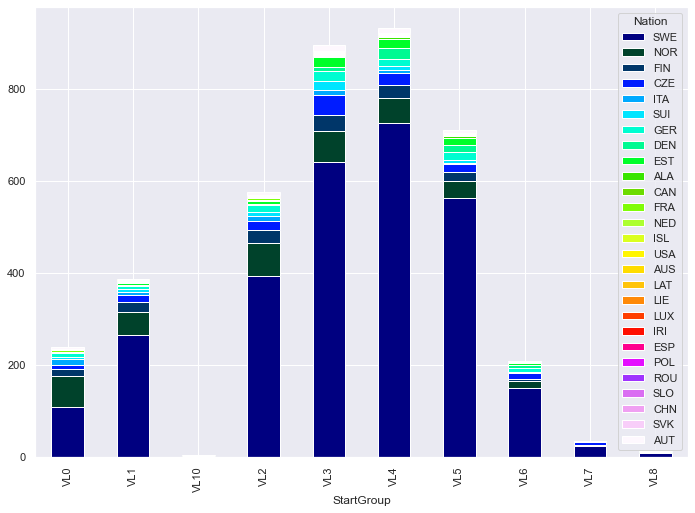

In [263]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

df_stgroup_nation.plot(kind='bar', stacked=True, colormap='gist_ncar')


In [58]:
df.columns

Index(['Bib', 'Group', 'Name', 'Nation', 'Sex', 'Place', 'StartGroup', 'Time',
       'Place_cat', 'Year'],
      dtype='object')

# startblock vs. results
* overlapping distributions for all startblocks
* same with boxplots (easier readable?) 
* mit ihrem neuen Seeding vergleichen https://www.vasaloppet.se/lopp/skidlopp/vasaloppet/seedning/seedningstabeller/
* wie viele haben sich mindestens eine Gruppe verbessert (Seeding)
* who advanced most? (not sure where EXACTLY they started in their block)

In [294]:
# Seedning from https://www.vasaloppet.se/lopp/skidlopp/vasaloppet/seedning/seedningstabeller/
seedning_2022_for_2023 = [datetime.datetime(2022, 3, 12, 4, 0, 54, 0), 
                          datetime.datetime(2022, 3, 12, 4, 30, 43, 0),
                          datetime.datetime(2022, 3, 12, 4, 55, 43, 0),
                          datetime.datetime(2022, 3, 12, 5, 35, 36, 0),
                          datetime.datetime(2022, 3, 12, 6, 15, 40, 0),
                          datetime.datetime(2022, 3, 12, 6, 56, 9, 0),
                          datetime.datetime(2022, 3, 12, 7, 42, 33, 0),
                          datetime.datetime(2022, 3, 12, 8, 35, 42, 0),
                          datetime.datetime(2022, 3, 12, 10, 2, 47, 0),
                          datetime.datetime(2022, 3, 12, 12, 1, 48, 0)]

seedning_2022_for_2023_dict = {
                          'VL0': datetime.datetime(2022, 3, 12, 4, 0, 54, 0), 
                          'VL1': datetime.datetime(2022, 3, 12, 4, 30, 43, 0),
                          'VL2': datetime.datetime(2022, 3, 12, 4, 55, 43, 0),
                          'VL3': datetime.datetime(2022, 3, 12, 5, 35, 36, 0),
                          'VL4': datetime.datetime(2022, 3, 12, 6, 15, 40, 0),
                          'VL5': datetime.datetime(2022, 3, 12, 6, 56, 9, 0),
                          'VL6': datetime.datetime(2022, 3, 12, 7, 42, 33, 0),
                          'VL7': datetime.datetime(2022, 3, 12, 8, 35, 42, 0),
                          'VL8': datetime.datetime(2022, 3, 12, 10, 2, 47, 0),
                          'VL9': datetime.datetime(2022, 3, 12, 12, 1, 48, 0)}

In [342]:
seedning_2022_for_2023_dict[startgroup]

datetime.datetime(2022, 3, 12, 4, 55, 43)

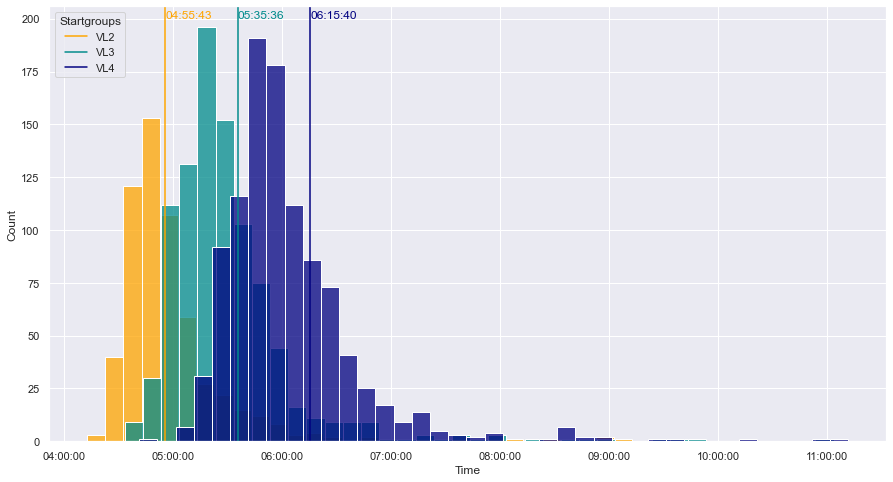

In [504]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()
colors = ['blue','red','orange','darkcyan','navy','purple','orangered','royalblue','darkblue','green','gray','black','gold','maroon']
startgroups = ['VL0','VL1','VL2','VL3','VL4','VL5','VL6','VL7','VL8','VL9','VL10']
colors_dict = {startgroups[i]: colors[i] for i in range(len(startgroups))}
i = 0
#startgroups = ['VL0','VL1','VL2']
startgroups = ['VL2','VL3','VL4']
rev_startgroups = reversed(startgroups)
for startgroup in startgroups:
    sns.histplot(df[df['StartGroup']==startgroup]['Time'], ax=ax, color=colors_dict[startgroup], binwidth=1/24/6)
    #sns.histplot(df[df['StartGroup']=='VL2']['Time'], ax=ax)
    # Line for new seeding
    if startgroup != 'VL10': 
        plt.axvline(seedning_2022_for_2023_dict[startgroup], color=colors_dict[startgroup])
        ax.text(seedning_2022_for_2023_dict[startgroup], 200,seedning_2022_for_2023_dict[startgroup].strftime("%H:%M:%S"), fontsize=12, color=colors_dict[startgroup]) #add text

    i = i+1

# LEGEND
plt.legend(title='Startgroups', loc='upper left', labels=startgroups)

# x ticks DateTime
x_dates = df['Time'].dt.strftime('%H:%M:%S').sort_values().unique()
#ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
# Define the date format
date_form = DateFormatter("%H:%M:%S")
ax.xaxis.set_major_formatter(date_form)

sns.set(rc={'figure.figsize':(15,8)})




{'VL0': 'blue', 'VL1': 'red', 'VL2': 'orange', 'VL3': 'cyan', 'VL4': 'navy', 'VL5': 'purple', 'VL6': 'maroon', 'VL7': 'green', 'VL8': 'tomato', 'VL9': 'gray', 'VL10': 'black'}


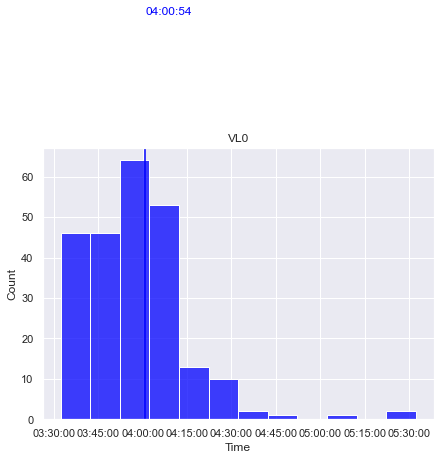

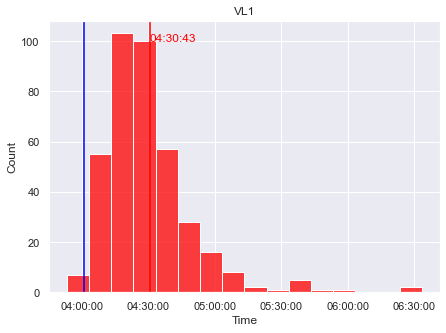

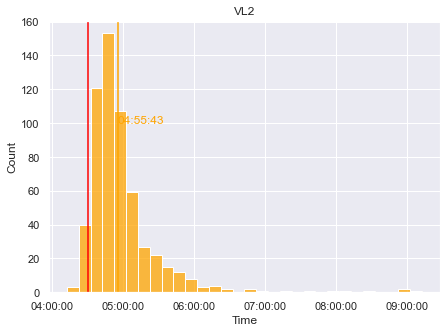

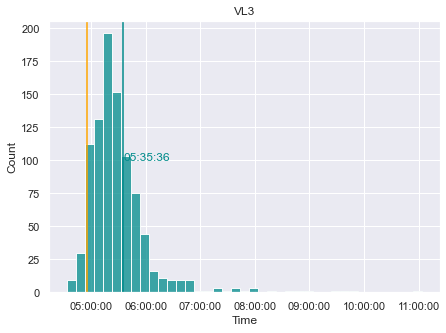

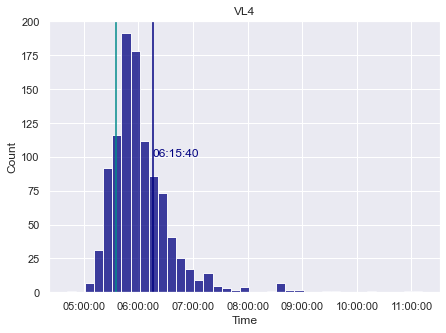

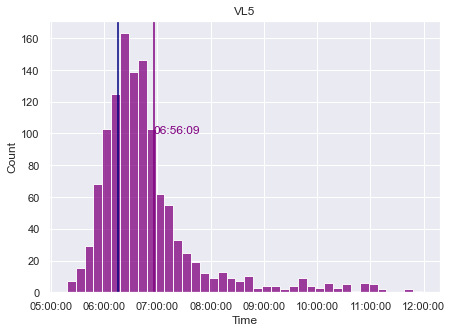

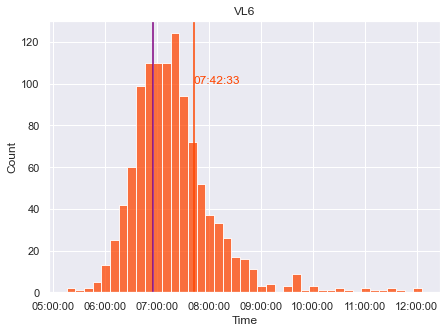

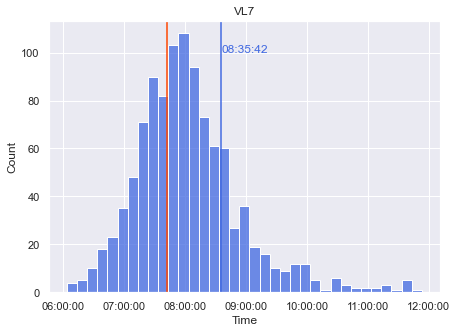

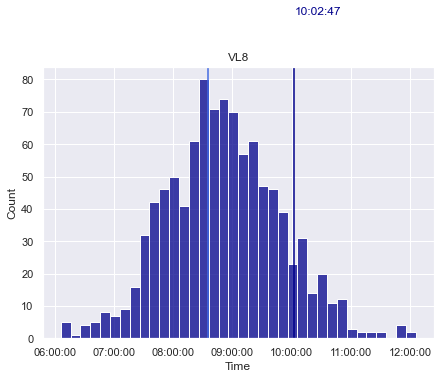

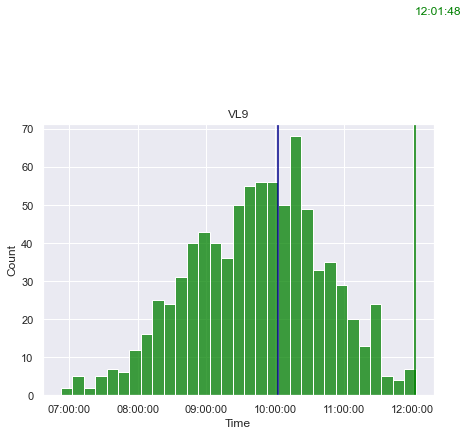

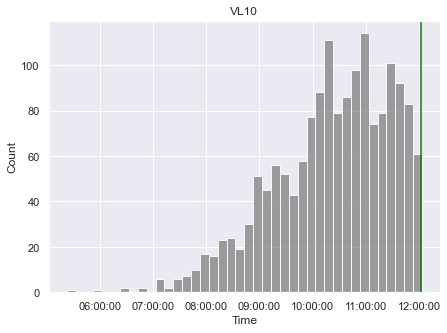

In [512]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

sns.set(rc={'figure.figsize':(7,5)})

colors = ['blue','red','orange','darkcyan','navy','purple','orangered','royalblue','darkblue','green','gray','black','gold','maroon']
startgroups = ['VL0','VL1','VL2','VL3','VL4','VL5','VL6','VL7','VL8','VL9','VL10']
colors_dict = {startgroups[i]: colors[i] for i in range(len(startgroups))}
print(res)
i = 0
#startgroups = ['VL0','VL1','VL2']
#startgroups = ['VL2','VL3','VL4']

#startgroups = df['StartGroup'].unique()#[0:-1]
for startgroup in startgroups:
    sg_int = df[df['StartGroup']==startgroup]['StartGroup_int'].unique()[0]
    prev_sg = f"VL{sg_int-1}"
    fig, ax = plt.subplots()
    sns.histplot(df[df['StartGroup']==startgroup]['Time'], ax=ax, color=colors_dict[startgroup], binwidth=1/24/6)
    #sns.histplot(df[df['StartGroup']=='VL2']['Time'], ax=ax)
    # Lines for new seeding
    # faster group
    if startgroup != 'VL0':
        plt.axvline(seedning_2022_for_2023_dict[prev_sg], color=colors_dict[prev_sg])
    # slower group
    if startgroup != 'VL10': 
        plt.axvline(seedning_2022_for_2023_dict[startgroup], color=colors_dict[startgroup])
        ax.text(seedning_2022_for_2023_dict[startgroup], 100,seedning_2022_for_2023_dict[startgroup].strftime("%H:%M:%S"), fontsize=12, color=colors_dict[startgroup]) #add text

    plt.title(startgroup)
    # x ticks DateTime
    x_dates = df['Time'].dt.strftime('%H:%M:%S').sort_values().unique()
    #ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
    # Define the date format
    date_form = DateFormatter("%H:%M:%S")
    ax.xaxis.set_major_formatter(date_form)

    i = i+1





## better startgroup in 2023

how many have qualified for a better group for next year?
hypothesis: it is hard to qualify in vasa, better to do a seeding race


In [430]:
def get_startgroup_changes(df, startgroups_wish):
    # startgroups in df
    startgroups_avail = df['StartGroup'].unique()
    # take intersection of wished for startgroups and available startgroups
    startgroups = [sg1 for sg1 in startgroups_wish if sg1 in startgroups_avail]
    result = []
    for sg in startgroups:
        sg_int = df[df['StartGroup']==sg]['StartGroup_int'].unique()[0]
        prev_sg = f"VL{sg_int-1}"
        n_winning = sum(df[df['StartGroup']==sg]['Time'] <= seedning_2022_for_2023_dict[prev_sg]) if sg != 'VL0' else 0
        n_staying = sum(df[df['StartGroup']==sg]['Time'] <= seedning_2022_for_2023_dict[sg]) if sg != 'VL10' else sum(df[df['StartGroup']==sg]['Time'] > seedning_2022_for_2023_dict[prev_sg]) #VL10: lowest group, no minimal time limit
        n_losing = sum(df[df['StartGroup']==sg]['Time'] > seedning_2022_for_2023_dict[sg]) if sg != 'VL10' else 0
        result = result + [[sg, sg_int, n_winning, n_staying, n_losing]]
    result_df = pd.DataFrame(result, columns=['StartGroup','StartGroup_int','n_winning','n_staying','n_losing'])
    return(result_df)


In [458]:
startgroups = df['StartGroup'].unique()
print(startgroups)
df_startgroups_n = get_startgroup_changes(df,startgroups).sort_values(by=['StartGroup_int'], axis=0).reset_index(drop=True)

df_startgroups_n['count'] = df_startgroups_n['n_winning']+df_startgroups_n['n_staying']+df_startgroups_n['n_losing']

# calculate percentages
df_startgroups_n['winning_perc'] = df_startgroups_n['n_winning']/df_startgroups_n['count']
df_startgroups_n['staying_perc'] = df_startgroups_n['n_staying']/df_startgroups_n['count']
df_startgroups_n['losing_perc'] = df_startgroups_n['n_losing']/df_startgroups_n['count']

df_startgroups_n[['StartGroup','winning_perc','staying_perc','losing_perc']]


['VL0' 'VL1' 'VL2' 'VL3' 'VL4' 'VL6' 'VL5' 'VL10' 'VL7' 'VL8' 'VL9']


,StartGroup,winning_perc,staying_perc,losing_perc
0,VL0,0.000000,0.613445,0.386555
1,VL1,0.010256,0.617949,0.371795
2,VL2,0.047078,0.571429,0.381494
3,VL3,0.053115,0.673136,0.273749
4,VL4,0.140940,0.648490,0.210570
5,VL5,0.201051,0.571616,0.227332
6,VL6,0.246397,0.582704,0.170899
7,VL7,0.263928,0.584262,0.151811
8,VL8,0.288667,0.633642,0.077691
9,VL9,0.375552,0.624448,0.000000


In [449]:
df_startgroups_n

,StartGroup,StartGroup_int,n_winning,n_staying,n_losing,count,winning_perc,staying_perc,losing_perc
0,VL0,0,0,146,92,238,0.000000,0.613445,0.386555
1,VL1,1,4,241,145,390,0.010256,0.617949,0.371795
2,VL2,2,29,352,235,616,0.047078,0.571429,0.381494
3,VL3,3,52,659,268,979,0.053115,0.673136,0.273749
4,VL4,4,168,773,251,1192,0.140940,0.648490,0.210570
5,VL5,5,306,870,346,1522,0.201051,0.571616,0.227332
6,VL6,6,359,849,249,1457,0.246397,0.582704,0.170899
7,VL7,7,379,839,218,1436,0.263928,0.584262,0.151811
8,VL8,8,405,889,109,1403,0.288667,0.633642,0.077691
9,VL9,9,510,848,0,1358,0.375552,0.624448,0.000000


In [450]:
df_startgroups_n['n_winning'].sum()/df_startgroups_n['count'].sum()

0.31339614911921343

# Sandbox

In [394]:
tmp = []
tmp + [1,'asdf']

[1, 'asdf']

In [388]:
tmp = 4 if 4<5 else 1
tmp

4

In [19]:
int((10-1)/2)

4

In [128]:
tmp = df['Time'].iloc[1]
tmp

'03:32:19'

In [132]:
date_time_obj = datetime.datetime.strptime(tmp, '%H:%M:%S')
date_time_obj

datetime.datetime(1900, 1, 1, 3, 32, 19)

0     2022-03-12 03:32:18
1     2022-03-12 03:32:19
2     2022-03-12 03:32:20
3     2022-03-12 03:32:21
4     2022-03-12 03:32:21
              ...        
995   2022-03-12 04:55:36
996   2022-03-12 04:55:39
997   2022-03-12 04:55:45
998   2022-03-12 04:55:48
999   2022-03-12 04:55:53
Name: Time, Length: 1000, dtype: datetime64[ns]

In [170]:
df1 = pd.DataFrame([[1,2],[3,4]])
df1

,0,1
0,1,2
1,3,4


In [172]:
df2 = pd.DataFrame([[1,2],[6,7]])
df2

,0,1
0,1,2
1,6,7


In [176]:
pd.concat([df1.reset_index(drop=True),df2.reset_index(drop=True)], axis=0)


,0,1
0,1,2
1,3,4
0,1,2
1,6,7


In [175]:
df

,Bib,Group,Name,Nation,Sex,Place,StartGroup,Time,Place_cat,Year
0,M15,H21,"Nygaard, Andreas",NOR,M,1,VL0,2022-03-12 03:32:18,1,2022
1,M4,H21,"Persson, Emil",SWE,M,2,VL0,2022-03-12 03:32:19,2,2022
2,M49,H21,"Jutterström, Axel",SWE,M,3,VL0,2022-03-12 03:32:20,3,2022
3,M29,H21,"Stadaas, Kasper",NOR,M,4,VL0,2022-03-12 03:32:21,4,2022
4,M32,H21,"Thele, Joar Andreas",NOR,M,5,VL0,2022-03-12 03:32:21,5,2022
...,...,...,...,...,...,...,...,...,...,...
995,3482,H45,"Hlavacek, Josef",CZE,M,1040,VL2,2022-03-12 04:55:36,996,2022
996,2575,H55,"Andersson, Ola",SWE,M,1041,VL2,2022-03-12 04:55:39,997,2022
997,3867,H21,"Thyselius, Fredrik",SWE,M,1043,VL3,2022-03-12 04:55:45,998,2022
998,4010,H50,"Olsson, Johan",SWE,M,1044,VL3,2022-03-12 04:55:48,999,2022


In [252]:
df['StartGroup_int'] = df['StartGroup'].str.extract('(\d+)', expand=False).astype(int)
df

,Bib,Group,Name,Nation,Sex,Place,StartGroup,Time,Place_cat,Year,StartGroup_int
0,M15,H21,"Nygaard, Andreas",NOR,M,1,VL0,2022-03-12 03:32:18,1,2022,0
1,M4,H21,"Persson, Emil",SWE,M,2,VL0,2022-03-12 03:32:19,2,2022,0
2,M49,H21,"Jutterström, Axel",SWE,M,3,VL0,2022-03-12 03:32:20,3,2022,0
3,M29,H21,"Stadaas, Kasper",NOR,M,4,VL0,2022-03-12 03:32:21,4,2022,0
4,M32,H21,"Thele, Joar Andreas",NOR,M,5,VL0,2022-03-12 03:32:21,5,2022,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,4490,H60,"Cuenot, Michel",SUI,M,4256,VL4,2022-03-12 06:42:16,3996,2022,4
3995,10358,H21,"Pettersson, Johan",SWE,M,4257,VL5,2022-03-12 06:42:16,3997,2022,5
3996,5134,H21,"Martinsson, Hugo",SWE,M,4258,VL5,2022-03-12 06:42:18,3998,2022,5
3997,5506,H45,"Maryska, Ondrej",CZE,M,4259,VL5,2022-03-12 06:42:19,3999,2022,5
